In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [3]:
# import the csv file
df = pd.read_csv('mydata.csv')

In [4]:
df

,name,description,latitude,longititude,color
0,Reitaku,minamikashiwa,35.833875,139.955204,black
1,Waseda,tokorozawa,35.785799,139.399755,red
2,Gakusyuin,mejiro,35.718845,139.709370,white
3,Ibarakichrist,omika,36.514694,140.616760,darkpurple
4,Housei,ichigaya,35.700535,139.741567,gray
5,Chiba,nishichiba,35.626581,140.101573,pink
6,Musashino,ariake,35.631260,139.786645,orange
7,Toyo,akabanedai,35.780796,139.715628,blue
8,Nihon,tsudanuma,35.692501,140.051166,darkred


In [5]:
# list of columns
df.columns.to_list()

['name', 'description', 'latitude', 'longititude', 'color']

In [8]:
# get values for a single column
df['longititude']

0    139.955204
1    139.399755
2    139.709370
3    140.616760
4    139.741567
5    140.101573
6    139.786645
7    139.715628
8    140.051166
Name: longititude, dtype: float64

In [9]:
# put those values in a list
df['latitude'].to_list()

[35.83387498,
 35.78579903,
 35.71884548,
 36.5146938,
 35.70053516,
 35.62658069,
 35.63126032,
 35.78079625,
 35.69250053]

<Axes: >

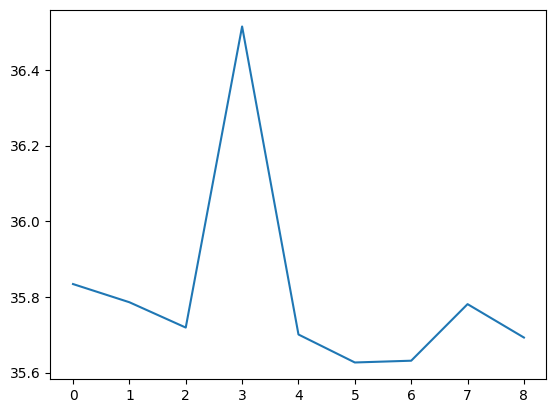

In [10]:
# line chart
df['latitude'].plot()

<Axes: >

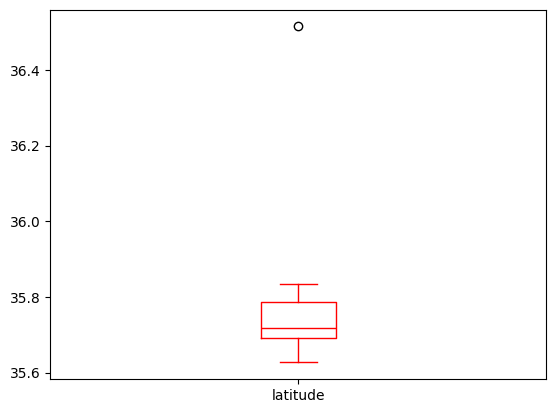

In [11]:
# boxplot 箱ヒゲ図
df['latitude'].plot.box(color='red')

<Axes: >

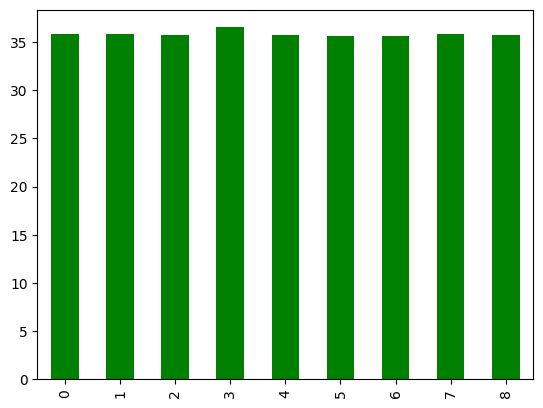

In [12]:
# bar graph
df['latitude'].plot.bar(color='green')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['black', 'red', 'white', 'darkpurple', 'gray', 'pink', 'orange',
       'blue', 'darkred'], dtype=object)

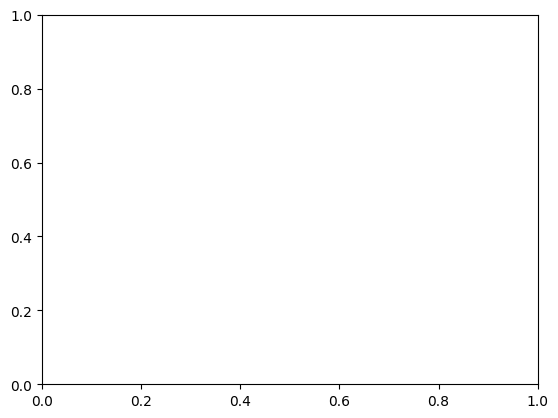

In [14]:
# scatterplot 散布図
# ここの 'c' は df の変数の 'color' を指定
# size(s) を変えてみよう
df.plot.scatter(x='longititude',y='latitude',c='color',s=50)

In [18]:
# get center lat/lon
center_lat = df['latitude'].mean()
center_lon = df['longititude'].mean()

print(center_lat,center_lon)

35.80943180444444 139.8975187888889


In [19]:
# loop through your data
for index, row in df.iterrows():
    print(row['name'])

Reitaku
Waseda
Gakusyuin
Ibarakichrist
Housei
Chiba
Musashino
Toyo
Nihon


In [21]:
# make the map
m = folium.Map(location=[center_lat,center_lon], zoom_start=17)

# df をループしてマーカーを作る
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longititude']]
    folium.Marker(latlon, 
                  popup='<div style="width:350px">'+row['description']+'</div>', 
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['color']
                )).add_to(m)

# show the map
m

In [23]:
# make the map
m = folium.Map(location=[center_lat,center_lon], 
               zoom_start=17,
               attr = '国土地理院')

# add basemaps
folium.TileLayer(name='2007年以降',tiles='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1987年～1990年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1984年～1986年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo3/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1979年～1983年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo2/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1974年～1978年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo1/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1961年～1969年',tiles='https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png',attr='国土地理院').add_to(m)

# basemapが選べるボタンをマップに足す
folium.LayerControl().add_to(m)

# add points
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longititude']]
    folium.Marker(latlon, popup='<div style="width:350px">'+row['description']+'</div>', tooltip=row['name'],icon=folium.Icon(color=row['color'])).add_to(m)

# show the map
m

In [24]:
# save the map as an html file
m.save('map.html')

In [25]:
import geopandas as gpd

In [26]:
gdf = gpd.read_file('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_day.geojson')

In [27]:
# make the map
eqmap = folium.Map(location=[0,0], 
               zoom_start=1,
               tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
               attr = 'ESRI')

folium.GeoJson(gdf,
               tooltip=folium.GeoJsonTooltip(fields=['title'])).add_to(eqmap)
eqmap